In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import time

import adj

In [34]:
img = cv2.imread("adj/C001H001S0001001500.bmp")
img = adj.adjust(img, alpha=3.0, beta=30.0)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [35]:
r_list = []

In [36]:
start = time.time()

In [37]:
def is_same(ij, r):
    for a in range(-5, 6):
        for b in range(-5, 6):
            if (ij[0]+a, ij[1]+b) in r:
                return True
    return False

In [38]:
for t in tqdm(range(0, 600)):
    tracer_img = cv2.imread(f"tracer_imgs_dark/tracer_{t}.bmp")
    tracer_img_rgb = cv2.cvtColor(tracer_img, cv2.COLOR_BGR2RGB)

    res = cv2.matchTemplate(img_rgb, tracer_img_rgb, cv2.TM_CCORR_NORMED)
    res_th_96_j, res_th_96_i = np.where(res > 0.97)

    for n in range(len(res_th_96_i)):
        i, j = res_th_96_i[n], res_th_96_j[n]
        if is_same((i, j), r_list):
            continue
        cv2.rectangle(img_rgb, (i, j), (i+20, j+20), (255, 0, 0), 1)
        r_list.append((i, j))

100%|██████████| 600/600 [00:26<00:00, 22.78it/s]


In [39]:
t = time.time() - start
print(t)

26.353888034820557


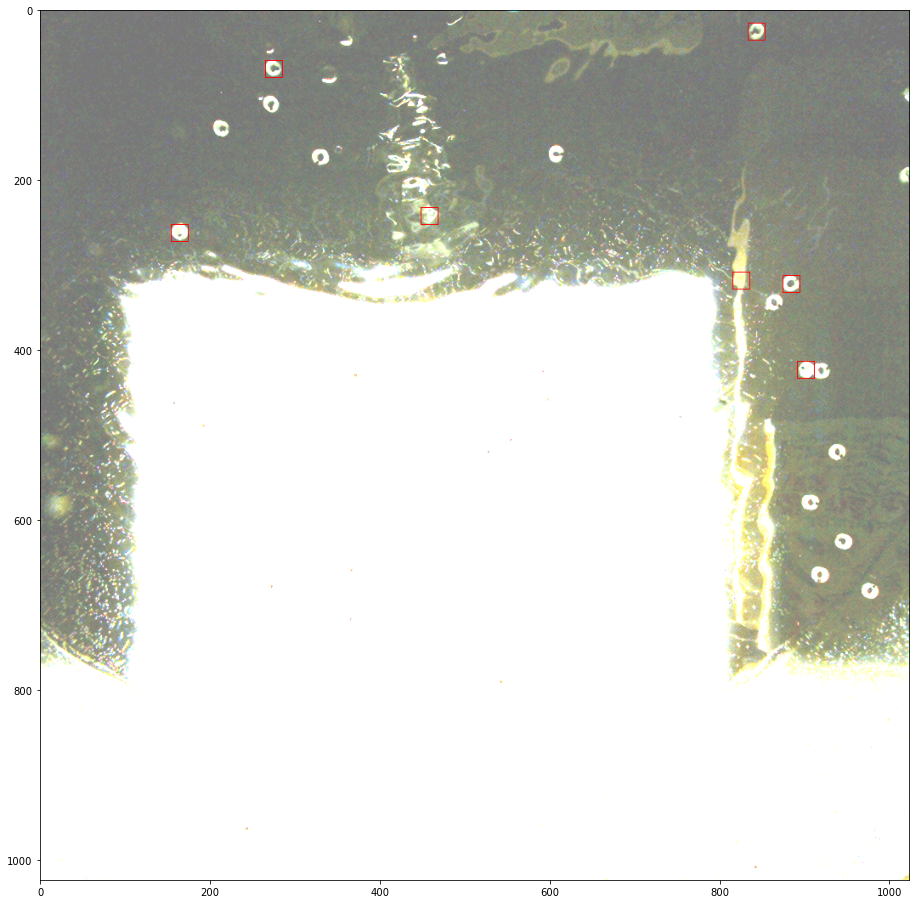

In [40]:
plt.figure(figsize=(16, 16))
plt.imshow(img_rgb)
plt.show()